<a href="https://colab.research.google.com/github/micaellimaj/Aprendizado_de_maquina/blob/main/Predi%C3%A7%C3%A3odediabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Aprendizado de Máquina: Previsão de Diabetes

## Introdução

https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

### Atributos:

## Pré Processamento

In [ ]:
# importando as bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
dados = pd.read_csv("diabetes_prediction_dataset.csv")

Vamos visualizar o conjunto de dados.

In [ ]:
dados.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


Agora verificamos se os dados posssuem valores nulos.

In [ ]:
valores_nulos = dados.isnull().values.any()

if valores_nulos:
  print("Há valores nulos na tabela.")
else:
  print("Não há valores nulos na tabela.")

Não há valores nulos na tabela.


In [ ]:
# verificando se realmente não há valores faltantes na tabela
valores_nulos = dados.isnull().sum()
print(valores_nulos)

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


Conhecendo melhor os dados:

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27528 entries, 0 to 27527
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               27528 non-null  object 
 1   age                  27528 non-null  float64
 2   hypertension         27528 non-null  int64  
 3   heart_disease        27528 non-null  int64  
 4   smoking_history      27528 non-null  object 
 5   bmi                  27528 non-null  float64
 6   HbA1c_level          27528 non-null  float64
 7   blood_glucose_level  27528 non-null  int64  
 8   diabetes             27528 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 1.9+ MB


In [ ]:
dados.shape

(27528, 9)

In [ ]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
age,27528.0,42.005618,22.498018,0.08,24.00,43.00,60.00,80.00
hypertension,27528.0,0.077194,0.266904,0.00,0.00,0.00,0.00,1.00
heart_disease,27528.0,0.038797,0.193114,0.00,0.00,0.00,0.00,1.00
bmi,27528.0,27.369845,6.682188,10.01,23.71,27.32,29.61,88.72
HbA1c_level,27528.0,5.524415,1.078814,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,27528.0,138.018817,40.993501,80.00,100.00,140.00,159.00,300.00
diabetes,27528.0,0.085731,0.279971,0.00,0.00,0.00,0.00,1.00


In [ ]:
dados[["gender","smoking_history"]].describe().T

,count,unique,top,freq
gender,27528,3,Female,16178
smoking_history,27528,6,never,9799


Vamos selecionar os atributos que devem está relacionados com o risco de desenvolver diabetes e manipular um a um.

In [ ]:
data = dados[["bmi","blood_glucose_level"]]

In [ ]:
data.head()

,bmi,blood_glucose_level
0,25.19,140
1,27.32,80
2,27.32,158
3,23.45,155
4,20.14,155


In [ ]:
data[['bmi']].describe().T

,count,mean,std,min,25%,50%,75%,max
bmi,27528.0,27.369845,6.682188,10.01,23.71,27.32,29.61,88.72


In [ ]:
data[['blood_glucose_level']].describe().T

,count,mean,std,min,25%,50%,75%,max
blood_glucose_level,27528.0,138.018817,40.993501,80.0,100.0,140.0,159.0,300.0


## Treino/ Teste

Vamos dividir nossa base de dados em duas, uma maior para treino e outra menor para teste para melhorar a capacidade do modelo em realizar predições de dados não vistos.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
predictors_train, predictors_test, target_train, target_test = train_test_split(
    data.drop(['bmi'], axis=1),
    data['bmi'],
    test_size = 0.25,
    random_state=123
)



*   **Variáveis Preditoras(Predictors)**



In [ ]:
predictors_train.head()

,blood_glucose_level
25748,80
1852,80
23399,126
283,90
24766,85


In [ ]:
predictors_train.shape

(20646, 1)

In [ ]:
predictors_test.head()

,blood_glucose_level
14767,158
3416,126
4208,159
11033,130
19665,100


In [ ]:
predictors_test.shape

(6882, 1)



*   **Variável Resposta (target)**



In [ ]:
target_train.head()

25748    23.33
1852     21.81
23399    15.87
283      33.83
24766    21.44
Name: bmi, dtype: float64

In [ ]:
target_train.shape

(20646,)

In [ ]:
target_test.head()

14767    20.47
3416     23.26
4208     36.40
11033    17.67
19665    17.46
Name: bmi, dtype: float64

In [ ]:
target_test.shape

(6882,)

## Treino

Para o treino temos que realizar o calculo dos coeficientes do modelo baseado na associação da variável resposta com  as variáveis preditores com o uso de um ou mais algoritmos.

**ALGORITMO**

Buscamos minimizar a diferença entre os pontos A e B, buscando os valores mais próximos em ambos os valores.

In [ ]:
model = model.fit(predictors_train, target_train)

In [ ]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['blood_glucose_level'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.01461354]),
 'rank_': 1,
 'singular_': array([5886.06128849]),
 'intercept_': 25.394431155889837}

In [ ]:
a = model.coef_
print(a)

[0.01461354]


In [ ]:
b = model.intercept_
print(b)

25.394431155889837


Com o modelo treinado, está na hora de fazer predições.

In [ ]:
data.head(1)

,bmi,blood_glucose_level
0,25.19,140


In [ ]:
blood_glucose_level = 140
bmi = (a * blood_glucose_level) + b

print(bmi)

[27.44032627]


In [ ]:
blood_glucose_level = np.array([140])
bmi = model.predict(blood_glucose_level.reshape(-1, 1))

print(bmi)

[27.44032627]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Avaliação

Agora precisamos avaliar a capacidade do modelo de generalização, avliando as predições de dados não vistos na etapa de treino.



*   **Diabetes Predito**




In [ ]:
target_predicted = model.predict(predictors_test)

In [ ]:
target_predicted[0:5]

array([27.70336993, 27.23573676, 27.71798347, 27.29419091, 26.85578481])

In [ ]:
target_predicted.shape

(6882,)



*   **Diabetes Teste**



In [ ]:
target_test[0:5]

14767    20.47
3416     23.26
4208     36.40
11033    17.67
19665    17.46
Name: bmi, dtype: float64

In [ ]:
target_test.shape

(6882,)

## RMSE

O RMSE mede a diferença média absoluta entre os valores preditos e os valores reais. Na maioria dos casos, quando menor a diferença, melhor o resultado.

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
rmse = np.sqrt(mean_squared_error(target_test, target_predicted))
print(rmse)

6.645117255945271


Vamos colocar gráficos com o intuito de ajudar na interpretação dos valores de reais de teste e os valores preditos.

In [ ]:
test_data = pd.concat([predictors_test, pd.DataFrame(target_test, columns=["bmi"])], axis=1).reset_index(drop=True)
test_data['predicted'] = False

In [ ]:
test_data.head()

,blood_glucose_level,bmi,predicted
0,158,20.47,False
1,126,23.26,False
2,159,36.40,False
3,130,17.67,False
4,100,17.46,False


In [ ]:
prediction_data = pd.concat([predictors_test.reset_index(drop=True), pd.DataFrame(target_predicted, columns=['bmi'])],axis=1).reset_index(drop=True)
prediction_data['predicted'] = True

In [ ]:
prediction_data.tail()

,blood_glucose_level,bmi,predicted
6877,145,27.513394,True
6878,126,27.235737,True
6879,126,27.235737,True
6880,100,26.855785,True
6881,90,26.709649,True


In [ ]:
prediction = pd.concat([test_data, prediction_data]).reset_index(drop=True)

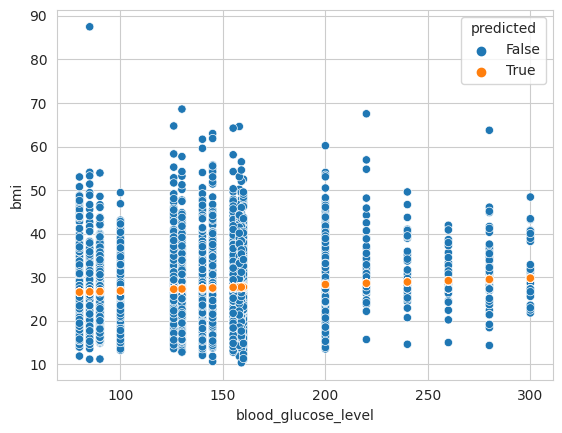

In [ ]:
with sns.axes_style('whitegrid'):

  sns.scatterplot(data=prediction, x ='blood_glucose_level', y='bmi',hue='predicted')

## Comparação

Para melhorar esse projeto, vamos comparar a qualidade de diferentes modelos. Para isso, vamos construir mais versão que vai utilizar um atributo a mais, o histórico de fumo. A hipótese é que o histórico de fumo diferente, pode ter peso e nivel de glicose diferentes.

In [ ]:
data = dados[['bmi','blood_glucose_level','smoking_history']]
data.head()

,bmi,blood_glucose_level,smoking_history
0,25.19,140,never
1,27.32,80,No Info
2,27.32,158,never
3,23.45,155,current
4,20.14,155,current




*   **smoking_history**: Atributo categótico nominal, one-hot encoding.



In [ ]:
data["smoking_history"].drop_duplicates()

0           never
1         No Info
3         current
11         former
19           ever
26    not current
Name: smoking_history, dtype: object

In [ ]:
data['never'] = data['smoking_history'].apply(lambda smoking_history: 1 if smoking_history == 'never' else 0)
data['no_info'] = data['smoking_history'].apply(lambda smoking_history: 1 if smoking_history == 'No Info' else 0)
data['current'] = data['smoking_history'].apply(lambda smoking_history: 1 if smoking_history == 'current' else 0)
data['former'] = data['smoking_history'].apply(lambda smoking_history: 1 if smoking_history == 'former' else 0)
data['ever'] = data['smoking_history'].apply(lambda smoking_history: 1 if smoking_history == 'ever' else 0)
data['not_current'] = data['smoking_history'].apply(lambda smoking_history: 1 if smoking_history == 'not current' else 0)

<ipython-input-49-ab7876990156>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['never'] = data['smoking_history'].apply(lambda smoking_history: 1 if smoking_history == 'never' else 0)
<ipython-input-49-ab7876990156>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['no_info'] = data['smoking_history'].apply(lambda smoking_history: 1 if smoking_history == 'No Info' else 0)
<ipython-input-49-ab7876990156>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [ ]:
data[['smoking_history','never','current','former','ever','not_current']].head()

,smoking_history,never,current,former,ever,not_current
0,never,1,0,0,0,0
1,No Info,0,0,0,0,0
2,never,1,0,0,0,0
3,current,0,1,0,0,0
4,current,0,1,0,0,0


In [ ]:
data = data.drop(['smoking_history'], axis =1)

In [ ]:
data.head()

,bmi,blood_glucose_level,never,no_info,current,former,ever,not_current
0,25.19,140,1,0,0,0,0,0
1,27.32,80,0,1,0,0,0,0
2,27.32,158,1,0,0,0,0,0
3,23.45,155,0,0,1,0,0,0
4,20.14,155,0,0,1,0,0,0




*   **Treino**








In [ ]:
predictors_train, predictors_test, target_train, target_test = train_test_split(
    data.drop(['bmi'], axis = 1),
    data['bmi'],
    test_size = 0.25,
    random_state = 123
)

In [ ]:
model_v2 = model.fit(predictors_train, target_train)
model_v2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['blood_glucose_level', 'never', 'no_info', 'current', 'former',
        'ever', 'not_current'], dtype=object),
 'n_features_in_': 7,
 'coef_': array([ 0.01230667,  0.00533068, -2.74728386,  0.33355431,  1.48244029,
         0.86091984,  0.06503874]),
 'rank_': 6,
 'singular_': array([5.88606293e+03, 8.56223204e+01, 5.77501089e+01, 4.38620708e+01,
        3.77803910e+01, 3.02553891e+01, 4.57270511e-14]),
 'intercept_': 26.469425766433858}

Agora estamos buscando uma reta multidimensional, então:

In [ ]:
a = model_v2.coef_
print(a)

[ 0.01230667  0.00533068 -2.74728386  0.33355431  1.48244029  0.86091984
  0.06503874]


In [ ]:
b = model_v2.intercept_
print(b)

26.469425766433858




*   **Avaliação**



In [ ]:
target_predicted = model_v2.predict(predictors_test)

In [ ]:
rmse_v2 = np.sqrt(mean_squared_error(target_test, target_predicted))
print(rmse_v2)

6.479023716811814


Agora temos a RSME de todas as versões do modelo, podemos compara-los.

 > **RMSE v1**: 6.6176525266339565
 >
 > **RMSE v2**: 6.458478135188669

In [ ]:
print(f"Melhoria de {round(100 * (1 - (rmse_v2 / rmse)), 2)}%")

Melhoria de 2.5%


Podemos observar a melhoria de performace em um gráfico.

In [ ]:
test_data = pd.concat([predictors_test, pd.DataFrame(target_test, columns=['bmi'])], axis=1).reset_index(drop=True)
test_data['predicted'] = False

prediction_data = pd.concat([predictors_test.reset_index(drop=True), pd.DataFrame(target_predicted, columns=['bmi'])], axis = 1).reset_index(drop=True)
prediction_data['predicted'] = True

prediction_v2 = pd.concat([test_data, prediction_data]).reset_index(drop=True)

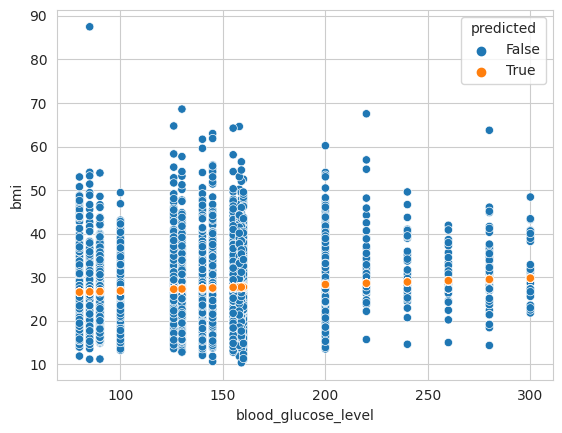

In [ ]:
with sns.axes_style('whitegrid'):

  sns.scatterplot(data=prediction, x='blood_glucose_level', y='bmi', hue='predicted')

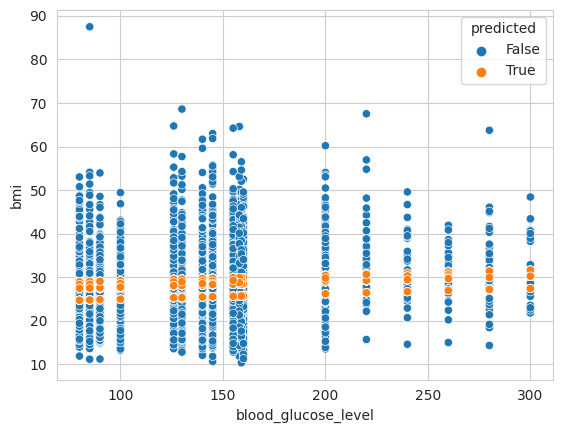

In [ ]:
with sns.axes_style('whitegrid'):

  sns.scatterplot(data=prediction_v2, x='blood_glucose_level', y='bmi', hue='predicted')

## Predição